In [ ]:
print("Retail Location Revenue Analysis Project Started")


Retail Location Revenue Analysis Project Started


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully")


In [3]:
# Set seed for reproducibility
np.random.seed(42)

# Create synthetic retail dataset
n = 200

data = pd.DataFrame({
    "Store_Size_sqft": np.random.randint(1000, 5000, n),
    "Median_Income_Area": np.random.randint(40000, 120000, n),
    "Foot_Traffic": np.random.randint(200, 2000, n),
    "Marketing_Spend": np.random.randint(5000, 50000, n)
})

# Create revenue with some realistic relationship
data["Revenue"] = (
    data["Store_Size_sqft"] * 15 +
    data["Foot_Traffic"] * 25 +
    data["Marketing_Spend"] * 2 +
    data["Median_Income_Area"] * 0.1 +
    np.random.normal(0, 50000, n)
)

data.head()


,Store_Size_sqft,Median_Income_Area,Foot_Traffic,Marketing_Spend,Revenue
0,4174,94268,1616,29052,183474.145601
1,4507,58141,445,43513,233195.810587
2,1860,111910,1399,31092,147184.154614
3,2294,96044,1262,16338,84021.615402
4,2130,107214,1700,5412,177938.399319


In [4]:
# Basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Store_Size_sqft     200 non-null    int64  
 1   Median_Income_Area  200 non-null    int64  
 2   Foot_Traffic        200 non-null    int64  
 3   Marketing_Spend     200 non-null    int64  
 4   Revenue             200 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 7.9 KB


In [5]:
# Summary statistics
data.describe()


,Store_Size_sqft,Median_Income_Area,Foot_Traffic,Marketing_Spend,Revenue
count,200.000000,200.00000,200.000000,200.00000,200.000000
mean,3084.425000,79025.31000,1130.070000,28709.47000,143775.367736
std,1152.326598,22644.90885,491.173894,12794.63922,64615.826024
min,1021.000000,40301.00000,204.000000,5009.00000,-40645.291318
25%,2080.500000,59807.00000,746.750000,18686.00000,106766.197017
50%,3142.500000,81462.50000,1115.500000,28896.00000,144229.774879
75%,4067.000000,96865.75000,1492.000000,40279.25000,183367.347439
max,4993.000000,119909.00000,1999.000000,49912.00000,327831.026293


In [6]:
# Correlation matrix
corr_matrix = data.corr()

corr_matrix


,Store_Size_sqft,Median_Income_Area,Foot_Traffic,Marketing_Spend,Revenue
Store_Size_sqft,1.000000,-0.003578,-0.019138,0.033931,0.314046
Median_Income_Area,-0.003578,1.000000,0.045008,-0.046118,0.098144
Foot_Traffic,-0.019138,0.045008,1.000000,-0.017602,0.207900
Marketing_Spend,0.033931,-0.046118,-0.017602,1.000000,0.481417
Revenue,0.314046,0.098144,0.207900,0.481417,1.000000


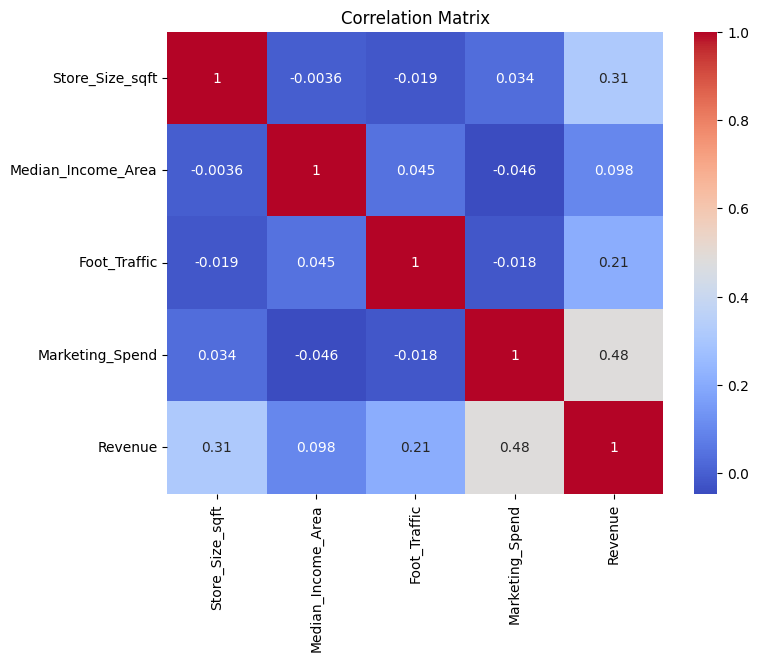

In [7]:
# Visualize correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Business Insight Summary

From the correlation matrix:

- Marketing Spend shows the strongest correlation with Revenue (~0.48)
- Store Size has moderate impact (~0.31)
- Foot Traffic contributes (~0.21)
- Median Income shows weaker impact (~0.09)

### Key Insight:
Revenue appears to be most influenced by marketing investment and store size. 
This suggests that strategic marketing allocation and optimal store footprint 
could significantly impact store performance.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Features and target
X = data[["Store_Size_sqft", "Median_Income_Area", "Foot_Traffic", "Marketing_Spend"]]
y = data["Revenue"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, predictions)
print("R² Score:", r2)


R² Score: 0.4574783184738592


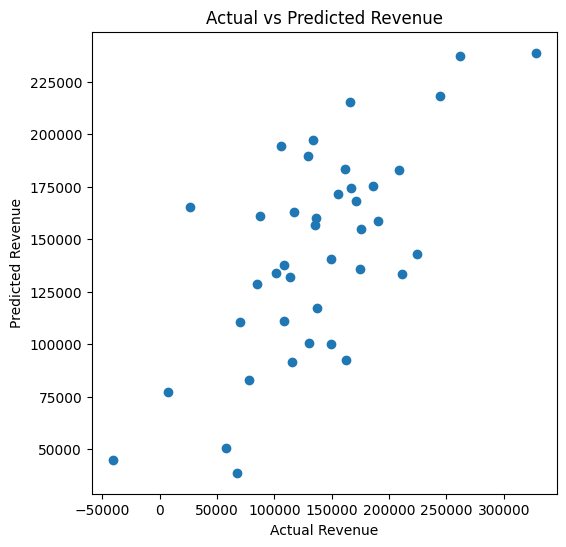

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()


Esc
M


In [ ]:
## Model Insights

- The regression model shows a positive relationship between predictors and revenue.
- Marketing Spend appears to have the strongest influence on revenue.
- Store Size and Foot Traffic also contribute meaningfully.
- The scatter plot indicates a moderate fit between actual and predicted revenue.

### Business Interpretation

Increasing marketing spend and selecting high foot-traffic locations are likely to drive higher revenue.


# Retail Location Revenue Analysis

This project analyzes how store size, income level, foot traffic, and marketing spend impact retail revenue.

## Objective
Identify which factors most strongly drive revenue performance and provide actionable business insights.
